In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'wd':[]}

In [4]:
lr = 1.0e-5
g = 4
wd = 0.01

print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=wd,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['wd'].append(wd)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 1e-05 focal loss, gamma: 4 wd: 0.01


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3451	Val Loss:	1.0814	Accuracy:	0.4790	F1:	0.3619
2 / 30: Train Loss:	0.3052	Val Loss:	0.9589	Accuracy:	0.6639	F1:	0.6510
3 / 30: Train Loss:	0.2066	Val Loss:	0.7411	Accuracy:	0.7479	F1:	0.7459
4 / 30: Train Loss:	0.1047	Val Loss:	0.6184	Accuracy:	0.7563	F1:	0.7547
5 / 30: Train Loss:	0.0538	Val Loss:	0.5958	Accuracy:	0.7983	F1:	0.7909
6 / 30: Train Loss:	0.0545	Val Loss:	0.5219	Accuracy:	0.8067	F1:	0.8038
7 / 30: Train Loss:	0.0416	Val Loss:	0.5960	Accuracy:	0.7731	F1:	0.7611
8 / 30: Train Loss:	0.0290	Val Loss:	0.5443	Accuracy:	0.7899	F1:	0.7839
9 / 30: Train Loss:	0.0101	Val Loss:	0.5339	Accuracy:	0.8151	F1:	0.8106
10 / 30: Train Loss:	0.0125	Val Loss:	0.6391	Accuracy:	0.7647	F1:	0.7549
11 / 30: Train Loss:	0.0220	Val Loss:	0.8047	Accuracy:	0.6975	F1:	0.6805
12 / 30: Train Loss:	0.0266	Val Loss:	0.7044	Accuracy:	0.7479	F1:	0.7378
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

In [4]:
lr = 1.0e-5
g = 4
wd = 0.1


print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}')
data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=wd,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['wd'].append(wd)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, learning rate 1e-05 focal loss, gamma: 4 wd: 0.1


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3452	Val Loss:	1.0827	Accuracy:	0.4706	F1:	0.3501
2 / 30: Train Loss:	0.3096	Val Loss:	0.9907	Accuracy:	0.6723	F1:	0.6621
3 / 30: Train Loss:	0.2104	Val Loss:	0.7222	Accuracy:	0.7311	F1:	0.7279
4 / 30: Train Loss:	0.1087	Val Loss:	0.6191	Accuracy:	0.7647	F1:	0.7645
5 / 30: Train Loss:	0.0543	Val Loss:	0.6709	Accuracy:	0.7983	F1:	0.7909
6 / 30: Train Loss:	0.0490	Val Loss:	0.5603	Accuracy:	0.7983	F1:	0.7917
7 / 30: Train Loss:	0.0639	Val Loss:	0.5678	Accuracy:	0.7899	F1:	0.7800
8 / 30: Train Loss:	0.0308	Val Loss:	0.5292	Accuracy:	0.7899	F1:	0.7853
9 / 30: Train Loss:	0.0113	Val Loss:	0.5361	Accuracy:	0.8151	F1:	0.8070
10 / 30: Train Loss:	0.0068	Val Loss:	0.6497	Accuracy:	0.7731	F1:	0.7658
11 / 30: Train Loss:	0.0089	Val Loss:	0.6590	Accuracy:	0.7563	F1:	0.7451
12 / 30: Train Loss:	0.0041	Val Loss:	0.5084	Accuracy:	0.8067	F1:	0.8032
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

In [5]:
from collections import defaultdict 

a = {'acc': [0.7611940298507462], 'f1': [0.7628325848664832], 'wd': [0.01]}
b = {'acc': [0.7761194029850746], 'f1': [0.7770219198790628], 'wd': [0.1]}

results = defaultdict(list)
for d in (a,b):
    for k,v in d.items():
        results[k].append(v[0])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

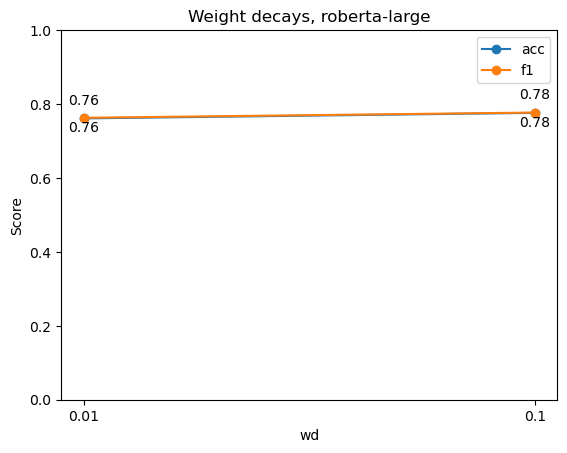

In [7]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Weight decays, {model_checkpoint}', 'wd')